<a href="https://colab.research.google.com/github/Tushar-31416/Computational-methods-4/blob/main/Computational_Methods_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.** The following is the code for producting 10,000 random numbers between 0 and using a linear congruential generator.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 986.6 kB/s eta 0:00:00
Time taken by LC to produce 10000 random numbers : 8854986 ns.


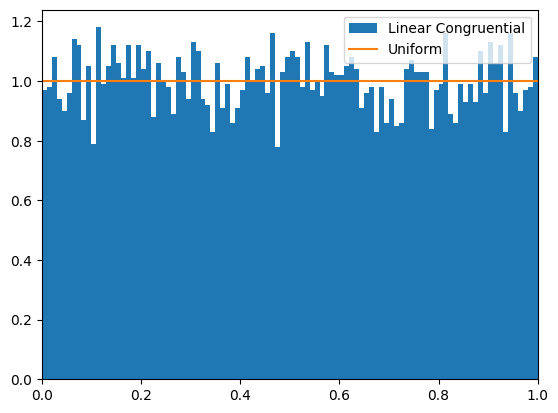

In [ ]:
!pip install emcee
!pip install corner
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy

a,c,m = 1135427, 7854379, 9328747
r0 = 1
rand = []
t0_1 = time.time_ns()
for i in range(10000):
    r = (a*r0+c)%m
    rand.append(r/m)
    r0 = r

t1_1 = time.time_ns()
print("Time taken by LC to produce 10000 random numbers :",t1_1-t0_1,"ns.")

plt.hist(rand,100,density=True,label='Linear Congruential')
plt.plot([0,1],np.ones(2),label='Uniform')
plt.xlim([0,1])
plt.legend()
plt.show()

**2.** The following is the code for producting 10,000 random numbers between 0 and using 'np.random.rand()'.

Time takenn by numpy to produce 10000 random numbers : 7615800 ns.


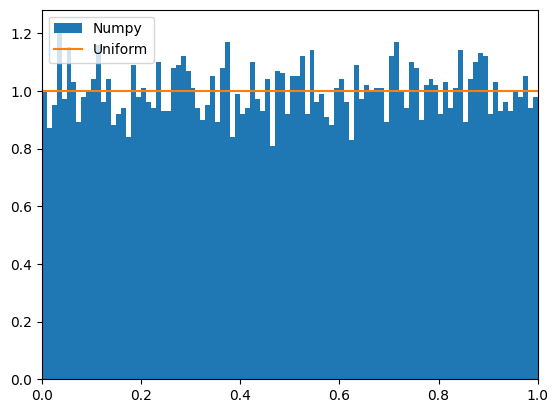

In [ ]:
rand = []
t0_2 = time.time_ns()
for i in range(10000):
    rand.append(np.random.rand())
t1_2 = time.time_ns()
print("Time takenn by numpy to produce 10000 random numbers :",t1_2-t0_2,'ns.')


plt.hist(rand,100,density=True,label='Numpy')
plt.plot([0,1],np.ones(2),label='Uniform')
plt.xlim([0,1])
plt.legend()
plt.show()

**3.** The time taken for the first and the second code are:

In [ ]:
print("Time taken for the first code =",t1_1-t0_1,' ns.')
print("Time taken for the second code =",t1_2-t0_2,' ns.')


Time taken for the first code = 8819925  ns.
Time taken for the second code = 7615800  ns.


**5.** The following code is to generate 10,000 random number distributed according to a Gaussian with mean 0 and variance 1, using Box-Muller method.


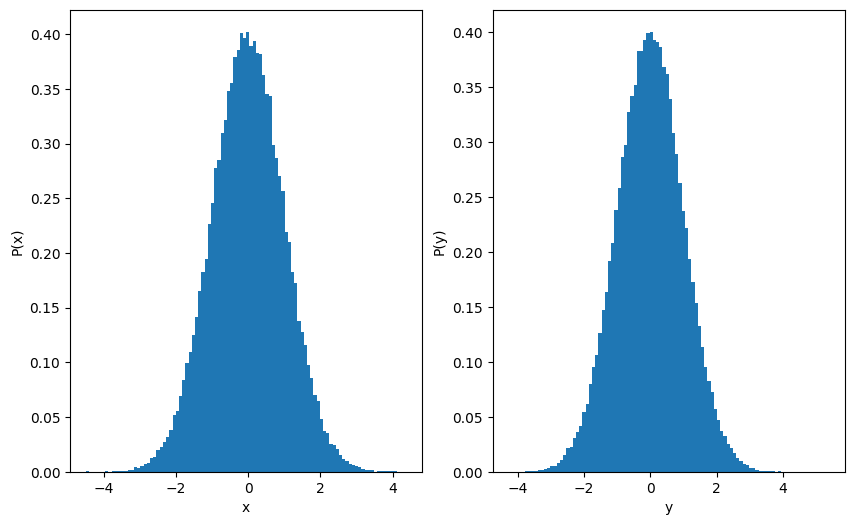

In [ ]:
N = 100000
x,y = [],[]
for i in range(N):
    q1,q2 = np.random.rand(), np.random.rand()
    r = (-2*np.log(q1))**0.5
    theta = 2*np.pi*q2
    x.append(r*np.cos(theta))
    y.append(r*np.sin(theta))


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 6))
ax1.hist(x,100,density=True)
ax1.set_xlabel('x')
ax1.set_ylabel('P(x)')

ax2.hist(y,100,density=True)
ax2.set_xlabel('y')
ax2.set_ylabel('P(y)')
plt.show()

**6.**

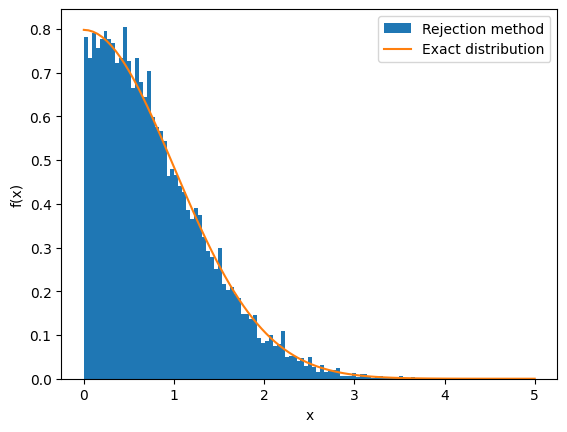

In [ ]:
def f(x):
    return (2/np.pi)**0.5*np.exp(-x**2/2)


N = 100000
rand = []
for i in range(N):
    x = 10*np.random.rand()
    y = (2/np.pi)**0.5*np.random.rand()
    if (y<f(x)):
        rand.append(x)

plt.hist(rand,100,density=True,label='Rejection method')
plt.plot(np.linspace(0,5,100),f(np.linspace(0,5,100)),label='Exact distribution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

**7.**

In [ ]:
obs1 = [4,10,10,13,20,18,18,11,13,14,13] #GIVEN
obs2 = [3,7,11,15,19,24,21,17,13,9,5] #GIVEN
exp = [4,8,12,16,20,24,20,16,12,8,4] #EXPECTED

chis1,chis2 = 0,0
for i in range(len(exp)):
  chis1 = chis1 + (obs1[i]-exp[i])**2/(1.0*exp[i])
  chis2 = chis2 + (obs2[i]-exp[i])**2/(1.0*exp[i])


def test(c):
  p = 1 - scipy.stats.chi2.cdf(chis1,10.0)
  if (p<0.01 or p>0.99):
    s = 'Not sufficiently random'
  elif(0.01<p<0.05 or 0.95<p<0.99):
    s = 'Suspect'
  elif(0.05<p<0.1 or 0.9<p<0.95):
    s = 'Almost suspect'
  else:
    s = 'Sufficiently random'
  return s

print('The first run is',test(chis1))
print('The second run is',test(chis2))

The first run is Not sufficiently random
The second run is Not sufficiently random


Thus, we conclude that the simulation is not sufficiently random.

**8.** The following code shows the calculation of the area of the unit circle calculated using Monte Carlo.

In [ ]:

N = 1000000
area = []
for dim in [2,10]:
#dim = 10
  xi,yi = [],[]
  xr,yr = [],[]
  hit = 0
  for i in range(N):
      x = 2*np.random.rand(dim)-1
      rs = 0
      for j in range(dim):
          rs = rs + x[j]**2
      if (rs<=1):
          hit = hit + 1
          xi.append(x[0])
          yi.append(x[1])
      else:
          xr.append(x[0])
          yr.append(x[1])
  area.append(2**dim*hit/N)
#print(area)
for k in range(2):
  print('Volume of the ',[2,10][k],'dimensional sphere is:',area[k])

Volume of the  2 dimensional sphere is: 3.143996
Volume of the  10 dimensional sphere is: 2.592768


**9.** Following code generates a uniform distribution for 3 < x < 7  and zero everywhere else using Metropolis algorithm.

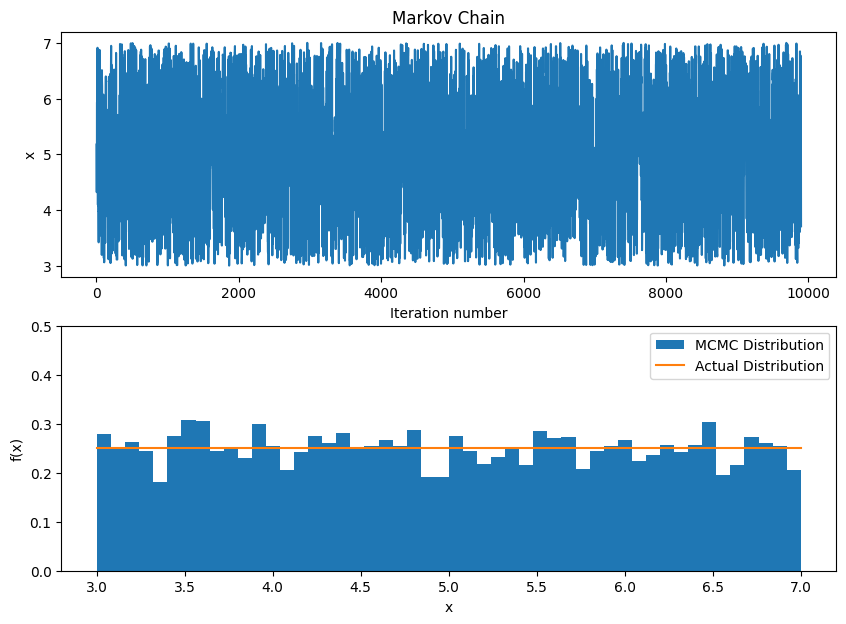

In [ ]:
def f(x):
    if(3<x<7):
        return 1
    else:
        return 0

N = 10000
burn = 100
x0 = 5
pos,itr = [],[]
n = 0
for i in range(N):
    x = x0 + np.random.normal(0,2)
    r = np.random.rand()
    if(f(x)/f(x0)>r):
        x0 = x
    if (i>burn):
        n = n+1
        pos.append(x0)
        itr.append(n)

fig,(ax1,ax2) = plt.subplots(2,figsize=(10,7))

ax1.set_title('Markov Chain')
ax1.plot(itr,pos)
ax1.set_xlabel('Iteration number')
ax1.set_ylabel('x')

ax2.hist(pos,50,density=True,label='MCMC Distribution')
ax2.plot([3,7],[0.25,0.25],label='Actual Distribution')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.legend()
ax2.set_ylim([0,0.5])


plt.show()


**10.**

In [ ]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner
from scipy.optimize import minimize

# Given data
x = np.array([201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146])
y = np.array([592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344])
yerr = np.array([61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22])


def model(theta, x):
  a,b,c = theta
  return a*x**2+b*x+c


def log_likelihood(theta, x, y, yerr):
    model_y = model(theta, x)
    sigma2 = yerr
    return -0.5 * np.sum((y - model_y)**2 / sigma2 + np.log(2 * np.pi * sigma2))


def log_prior(theta):
  return 0

def log_posterior(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


ndim = 3
nwalkers = 50
nsteps = 4000

#Initializing
initial = np.array([0.0,3.0,100.0])
nll = lambda *args: -log_likelihood(*args)
soln = minimize(nll,initial,args=(x,y,yerr))
pos = soln.x + 1e-4 * np.random.randn(nwalkers, ndim)




# Create the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, yerr))

# Run the MCMC sampler
sampler.run_mcmc(pos, nsteps, progress=True)

# Analyze the results
samples = sampler.get_chain()


100%|██████████| 4000/4000 [00:08<00:00, 447.18it/s]


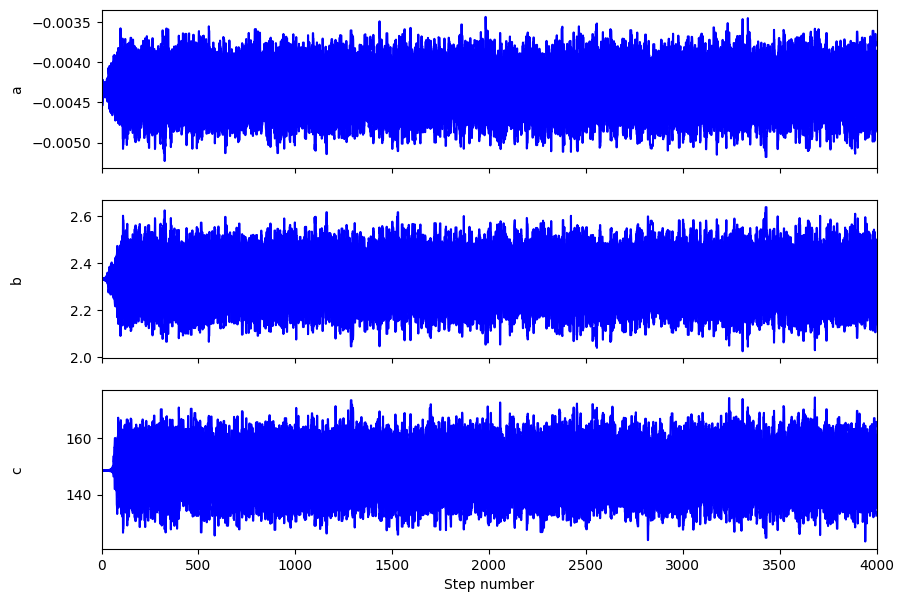

In [ ]:

#plotting the chains
fig, axes = plt.subplots(3,figsize=(10,7),sharex=True)
labels = ['a','b','c']
for i in range(ndim):
  ax = axes[i]
  ax.plot(samples[:,:,i],'b')
  ax.set_xlim(0,len(samples))
  ax.set_ylabel(labels[i])
  ax.yaxis.set_label_coords(-0.1,0.5)
axes[-1].set_xlabel('Step number');

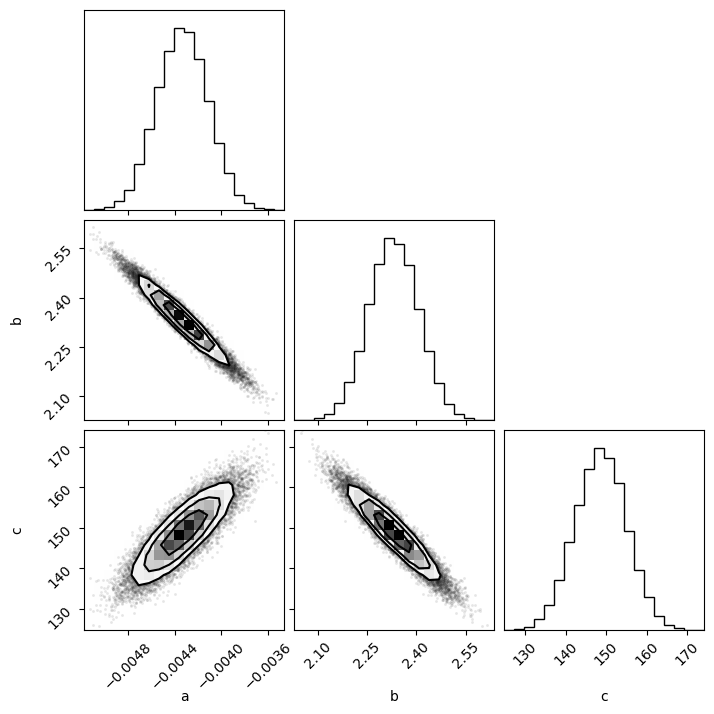

The mean values of
a: -0.004,  b:  2.331, c: 148.631
The one sigma uncertainties of
a: 0.000, b: 0.075, c: 6.298


In [ ]:

# Plot the corner plot
samples = sampler.get_chain(discard=100, thin=10, flat=True)  # Discard the first 100 steps as burn-in and thin the chain
fig = corner.corner(samples, labels=["a", "b","c"])
plt.show()

a_mean ,b_mean, c_mean = np.mean(samples, axis=0)
a_std,b_std,c_std = np.std(samples,axis=0)
print("The mean values of")
print(f"a: {a_mean: .3f},  b: {b_mean: .3f}, c:{c_mean: .3f}")
print("The one sigma uncertainties of")
print(f"a:{a_std: .3f}, b:{b_std: .3f}, c:{c_std: .3f}")



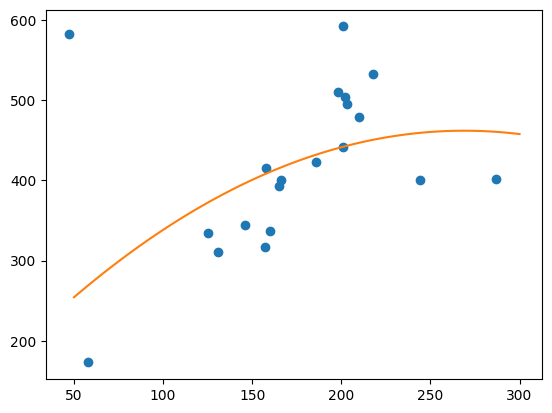

In [ ]:

plt.plot(x,y,'o')
plt.plot(np.linspace(50,300,100),model([a_mean,b_mean,c_mean],np.linspace(50,300,100)))

plt.show()


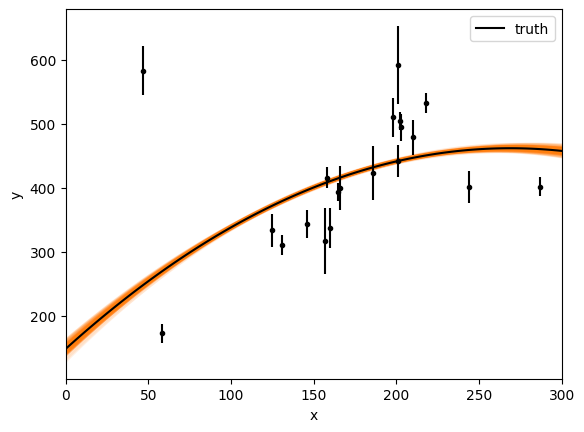

In [ ]:
inds = np.random.randint(len(samples),size=200)
x0 = np.linspace(0,300,100)
for ind in inds:
  sample = samples[ind]
  plt.plot(x0,np.dot(np.vander(x0,3),sample[:3]),'C1',alpha=0.1)
plt.errorbar(x,y,yerr=yerr,fmt='.k',capsize=0)
plt.plot(x0,model([a_mean,b_mean,c_mean],x0),'k',label='truth')
plt.legend()
plt.xlim(0,300)
plt.xlabel('x')
plt.ylabel('y')
plt.show()